#  Supply Chain Data

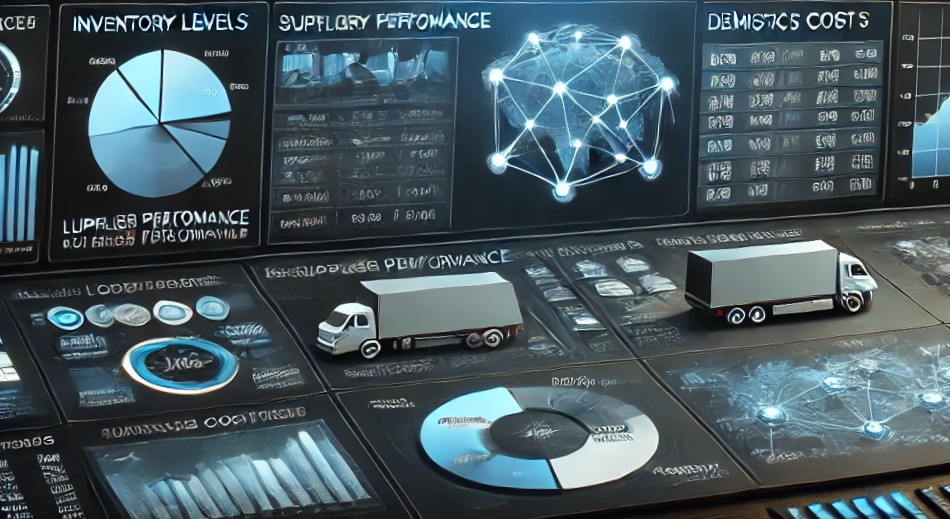


# Table of Contents:-
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Some Questions</a></li>
<li><a href="#conclusions">Conclusions</a></li>

</ul>

# Introduction
### In this project, we worked with supply chain data. Before analysis, the data needed to be cleaned to ensure accuracy and reliability. The preprocessing steps included removing unnecessary columns, handling missing values, converting data types, and fixing any inconsistencies. This process improved the quality of the dataset, making it ready for further analysis and insights.




# Data Wrangling

In [67]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("SCMS_Delivery_History_Dataset_20150929.csv", encoding="latin1")

In [69]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [73]:
# Dropping unnecessary columns from the DataFrame
df = df.drop(columns=["ID", "PQ #", "PO / SO #", "ASN/DN #", "Vendor INCO Term", "First Line Designation","Dosage",
"Manufacturing Site", "Unit of Measure (Per Pack)", "PQ First Sent to Client Date", "PO Sent to Vendor Date","Delivery Recorded Date","Dosage Form"])


In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Project Code               10324 non-null  object 
 1   Country                    10324 non-null  object 
 2   Managed By                 10324 non-null  object 
 3   Fulfill Via                10324 non-null  object 
 4   Shipment Mode              9964 non-null   object 
 5   Scheduled Delivery Date    10324 non-null  object 
 6   Delivered to Client Date   10324 non-null  object 
 7   Product Group              10324 non-null  object 
 8   Sub Classification         10324 non-null  object 
 9   Vendor                     10324 non-null  object 
 10  Item Description           10324 non-null  object 
 11  Molecule/Test Type         10324 non-null  object 
 12  Brand                      10324 non-null  object 
 13  Line Item Quantity         10324 non-null  int

In [77]:
# Convert the "Weight (Kilograms)" column to numeric values
# If there are non-numeric values, they will be replaced with NaN instead of causing errors
df["Weight (Kilograms)"] = pd.to_numeric(df["Weight (Kilograms)"], errors='coerce')
# Convert the "Freight Cost (USD)" column to numeric values
# Any non-numeric values will be coerced into NaN
df["Freight Cost (USD)"] = pd.to_numeric(df["Freight Cost (USD)"], errors='coerce')


In [79]:
# Print the number of missing (NaN) values in each column of the DataFrame
print(df.isnull().sum())

Project Code                    0
Country                         0
Managed By                      0
Fulfill Via                     0
Shipment Mode                 360
Scheduled Delivery Date         0
Delivered to Client Date        0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Weight (Kilograms)           3952
Freight Cost (USD)           4126
Line Item Insurance (USD)     287
dtype: int64


In [81]:
# Fill missing values in the "Weight (Kilograms)" column with the median of the column
df["Weight (Kilograms)"] = df["Weight (Kilograms)"].fillna(df["Weight (Kilograms)"].median())
# Fill missing values in the "Freight Cost (USD)" column with the median of the column
df["Freight Cost (USD)"] = df["Freight Cost (USD)"].fillna(df["Freight Cost (USD)"].median())
print(df.isnull().sum())

Project Code                   0
Country                        0
Managed By                     0
Fulfill Via                    0
Shipment Mode                360
Scheduled Delivery Date        0
Delivered to Client Date       0
Product Group                  0
Sub Classification             0
Vendor                         0
Item Description               0
Molecule/Test Type             0
Brand                          0
Line Item Quantity             0
Line Item Value                0
Pack Price                     0
Unit Price                     0
Weight (Kilograms)             0
Freight Cost (USD)             0
Line Item Insurance (USD)    287
dtype: int64


In [83]:
# Fill missing values in the "Shipment Mode" column with the string "Unknown"
# This is useful for categorical data where missing values are replaced with a placeholder
df["Shipment Mode"] = df["Shipment Mode"].fillna("Unknown")  
# Fill missing values in the "Line Item Insurance (USD)" column with the median of the column
# This ensures numerical consistency while avoiding the influence of outliers
df["Line Item Insurance (USD)"] = df["Line Item Insurance (USD)"].fillna(df["Line Item Insurance (USD)"].median())  
print(df.isnull().sum())

Project Code                 0
Country                      0
Managed By                   0
Fulfill Via                  0
Shipment Mode                0
Scheduled Delivery Date      0
Delivered to Client Date     0
Product Group                0
Sub Classification           0
Vendor                       0
Item Description             0
Molecule/Test Type           0
Brand                        0
Line Item Quantity           0
Line Item Value              0
Pack Price                   0
Unit Price                   0
Weight (Kilograms)           0
Freight Cost (USD)           0
Line Item Insurance (USD)    0
dtype: int64


In [85]:
print(df.duplicated().sum())

68


In [87]:
df = df.drop_duplicates()

In [89]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10256 entries, 0 to 10323
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Project Code               10256 non-null  object 
 1   Country                    10256 non-null  object 
 2   Managed By                 10256 non-null  object 
 3   Fulfill Via                10256 non-null  object 
 4   Shipment Mode              10256 non-null  object 
 5   Scheduled Delivery Date    10256 non-null  object 
 6   Delivered to Client Date   10256 non-null  object 
 7   Product Group              10256 non-null  object 
 8   Sub Classification         10256 non-null  object 
 9   Vendor                     10256 non-null  object 
 10  Item Description           10256 non-null  object 
 11  Molecule/Test Type         10256 non-null  object 
 12  Brand                      10256 non-null  object 
 13  Line Item Quantity         10256 non-null  int64  


In [91]:
print(df.describe())

       Line Item Quantity  Line Item Value    Pack Price    Unit Price  \
count        10256.000000     1.025600e+04  10256.000000  10256.000000   
mean         18427.959828     1.582024e+05     21.858188      0.596229   
std          40137.468234     3.461393e+05     45.699485      3.228462   
min              1.000000     0.000000e+00      0.000000      0.000000   
25%            417.750000     4.422625e+03      4.120000      0.080000   
50%           3026.000000     3.063655e+04      9.280000      0.160000   
75%          17247.250000     1.666309e+05     23.450000      0.460000   
max         619999.000000     5.951990e+06   1345.640000    238.650000   

       Weight (Kilograms)  Freight Cost (USD)  Line Item Insurance (USD)  
count        10256.000000        10256.000000               10256.000000  
mean          2522.904739         9002.696268                 235.607871  
std          10724.149007        12533.698526                 495.334342  
min              0.000000        

# Exploratory Data Analysis (EDA)

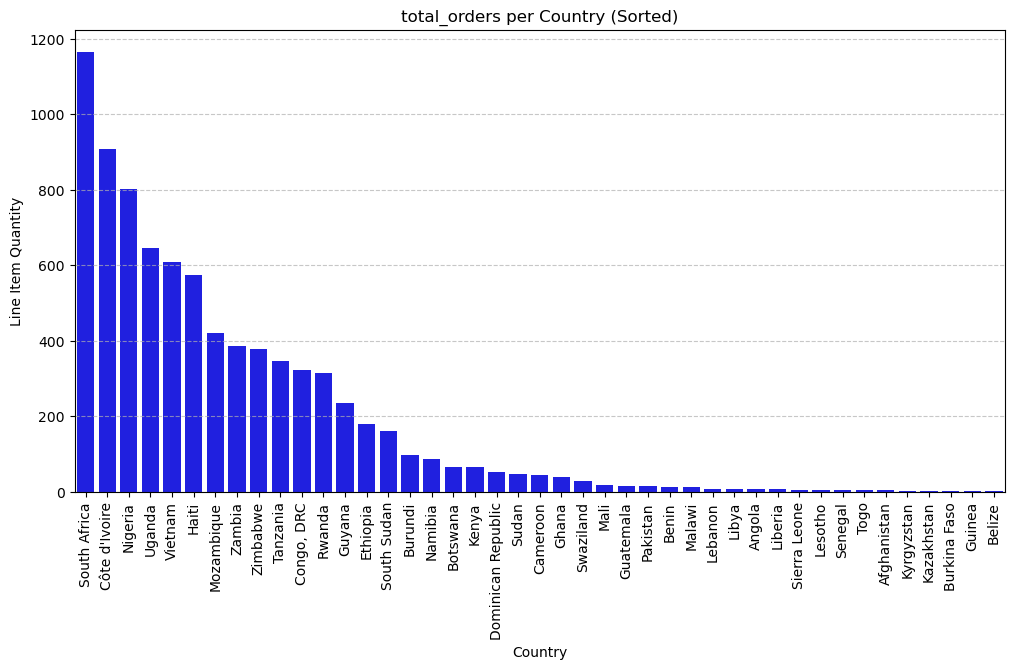

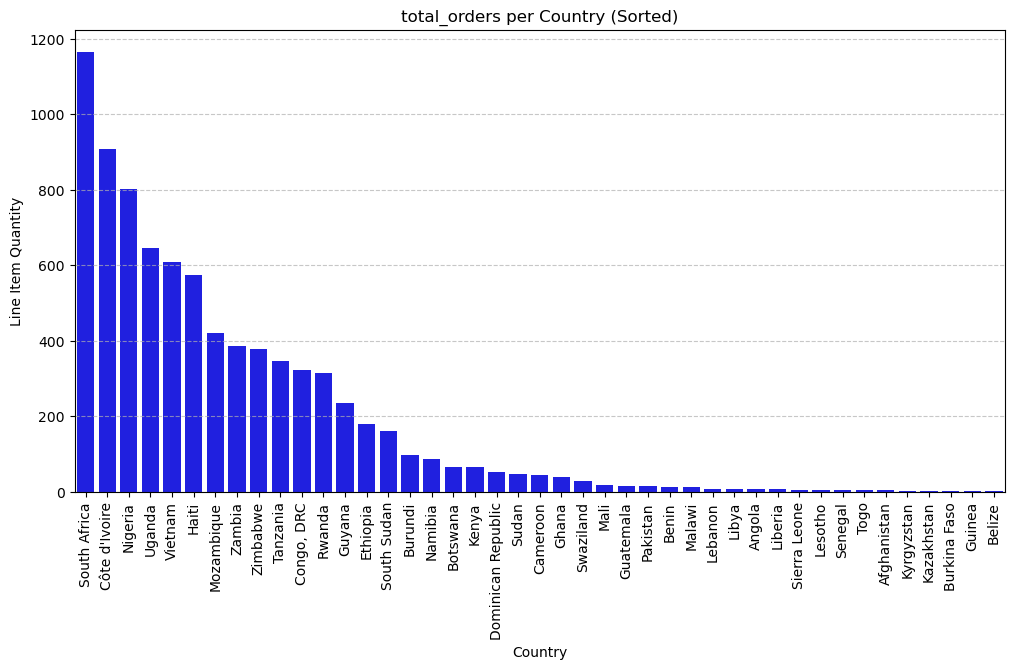

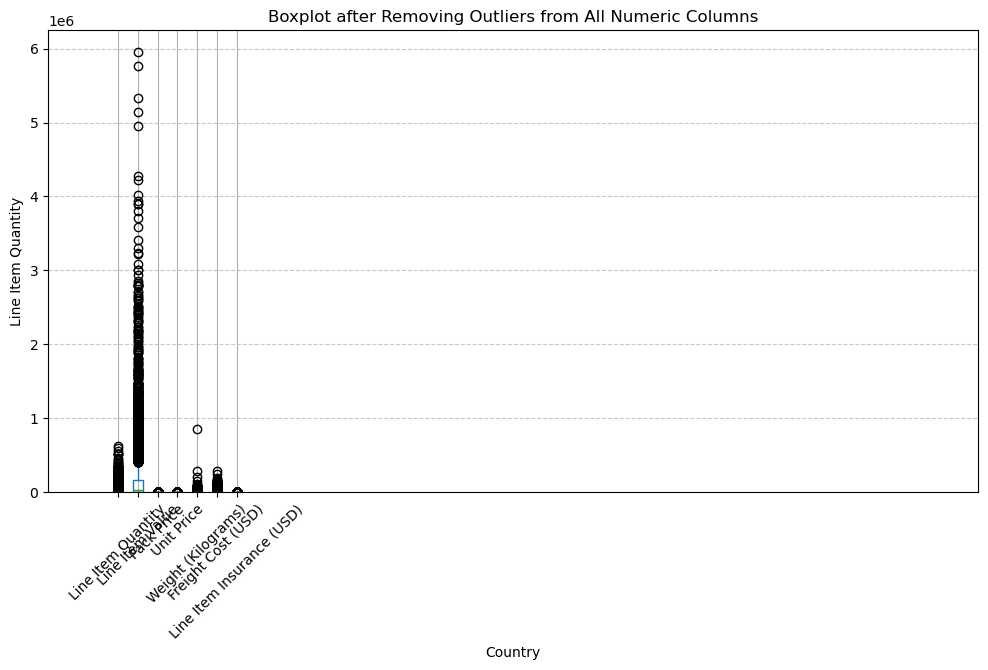

In [94]:
# Define a list of numeric columns to visualize for potential outliers
numeric_columns = ["Line Item Quantity", "Line Item Value", "Pack Price", "Unit Price",
                   "Weight (Kilograms)", "Freight Cost (USD)", "Line Item Insurance (USD)"]
# Create a boxplot to visualize the distribution of values and detect outliers in numeric columns
df.boxplot(column=numeric_columns, figsize=(12, 6))
plt.title("Boxplot after Removing Outliers from All Numeric Columns")
plt.xticks(rotation=45)
plt.show()

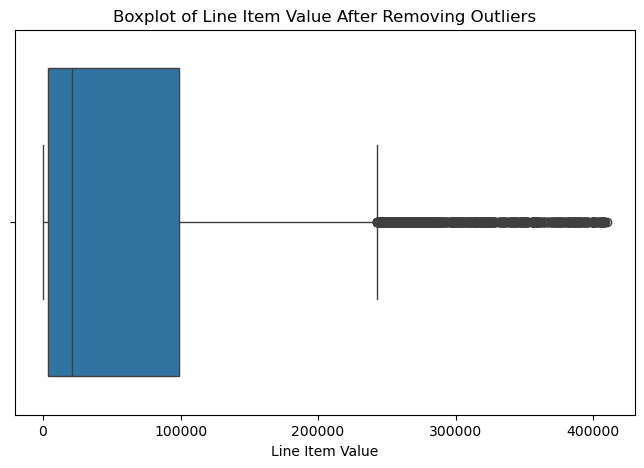

In [95]:
# Calculate the first quartile (Q1) and third quartile (Q3) for "Line Item Value"
Q1 = df["Line Item Value"].quantile(0.25)
Q3 = df["Line Item Value"].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only values within the defined bounds
df_cleaned = df[(df["Line Item Value"] >= lower_bound) & (df["Line Item Value"] <= upper_bound)]

# Create a copy of the cleaned DataFrame to avoid modifying the original data
df = df_cleaned.copy()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Line Item Value"])
plt.title("Boxplot of Line Item Value After Removing Outliers")
plt.show()


In [96]:
# Calculate the first quartile (Q1) and third quartile (Q3) for "Weight (Kilograms)"
Q1 = df["Weight (Kilograms)"].quantile(0.25)
Q3 = df["Weight (Kilograms)"].quantile(0.75)
# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers using a 3*IQR threshold
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

df_cleaned = df[(df["Weight (Kilograms)"] >= lower_bound) & (df["Weight (Kilograms)"] <= upper_bound)]
df = df_cleaned.copy()


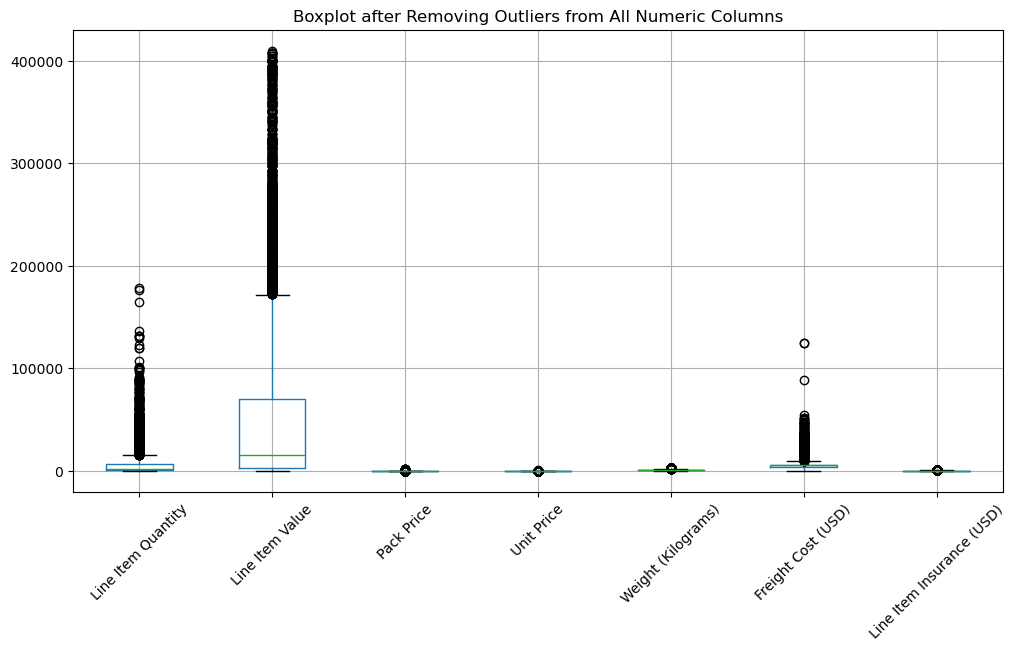

In [98]:
# Define a list of numeric columns to visualize for potential remaining outliers
numeric_columns = ["Line Item Quantity", "Line Item Value", "Pack Price", "Unit Price",
                   "Weight (Kilograms)", "Freight Cost (USD)", "Line Item Insurance (USD)"]
# Create a boxplot to visualize the distribution of values and detect any remaining outliers
df.boxplot(column=numeric_columns, figsize=(12, 6))
plt.title("Boxplot after Removing Outliers from All Numeric Columns")
plt.xticks(rotation=45)
plt.show()

In [102]:
print(df.describe())

       Line Item Quantity  Line Item Value   Pack Price   Unit Price  \
count         8089.000000      8089.000000  8089.000000  8089.000000   
mean          6293.046854     54497.066312    23.848738     0.639085   
std          12348.646383     82335.515201    50.077271     3.473492   
min              1.000000         0.000000     0.000000     0.000000   
25%            240.000000      2608.000000     3.950000     0.070000   
50%           1614.000000     15524.000000     9.710000     0.160000   
75%           6362.000000     70421.400000    27.000000     0.570000   
max         178097.000000    409822.740000  1345.640000   238.650000   

       Weight (Kilograms)  Freight Cost (USD)  Line Item Insurance (USD)  
count         8089.000000         8089.000000                8089.000000  
mean           875.058845         6118.236097                  84.330121  
std            588.922144         5703.631274                 132.476756  
min              0.000000            0.750000      

In [104]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8089 entries, 0 to 10323
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Project Code               8089 non-null   object 
 1   Country                    8089 non-null   object 
 2   Managed By                 8089 non-null   object 
 3   Fulfill Via                8089 non-null   object 
 4   Shipment Mode              8089 non-null   object 
 5   Scheduled Delivery Date    8089 non-null   object 
 6   Delivered to Client Date   8089 non-null   object 
 7   Product Group              8089 non-null   object 
 8   Sub Classification         8089 non-null   object 
 9   Vendor                     8089 non-null   object 
 10  Item Description           8089 non-null   object 
 11  Molecule/Test Type         8089 non-null   object 
 12  Brand                      8089 non-null   object 
 13  Line Item Quantity         8089 non-null   int64  
 

In [106]:
df

,Project Code,Country,Managed By,Fulfill Via,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,Côte d'Ivoire,PMO - US,Direct Drop,Air,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,19,551.00,29.00,0.97,13.0,780.340,47.04
1,108-VN-T01,Vietnam,PMO - US,Direct Drop,Air,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,1000,6200.00,6.20,0.03,358.0,4521.500,47.04
2,100-CI-T01,Côte d'Ivoire,PMO - US,Direct Drop,Air,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,500,40000.00,80.00,0.80,171.0,1653.780,47.04
3,108-VN-T01,Vietnam,PMO - US,Direct Drop,Air,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,31920,127360.80,3.99,0.07,1855.0,16007.060,47.04
5,112-NG-T01,Nigeria,PMO - US,Direct Drop,Air,28-Sep-06,28-Sep-06,ARV,Pediatric,Aurobindo Pharma Limited,"Zidovudine 10mg/ml, oral solution, Bottle, 240 ml",Zidovudine,Generic,416,2225.60,5.35,0.02,504.0,5920.420,47.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,151-NG-T30,Nigeria,PMO - US,From RDC,Air Charter,2-Jun-15,15-May-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,15000,97800.00,6.52,0.11,1547.0,3410.000,115.11
10317,151-NG-T30,Nigeria,PMO - US,From RDC,Air,30-Jun-15,22-Jun-15,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,6724,20978.88,3.12,0.10,1047.0,5869.655,24.69
10320,104-CI-T30,Côte d'Ivoire,PMO - US,From RDC,Truck,31-Jul-15,6-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,21072,137389.44,6.52,0.11,1047.0,5869.655,161.71
10322,200-ZW-T30,Zimbabwe,PMO - US,From RDC,Truck,9-Sep-15,4-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,17465,113871.80,6.52,0.11,1392.0,5869.655,134.03


#

# Some Questions

## 1- What is the total number of orders (line item quantity) per country, sorted in descending order?

#

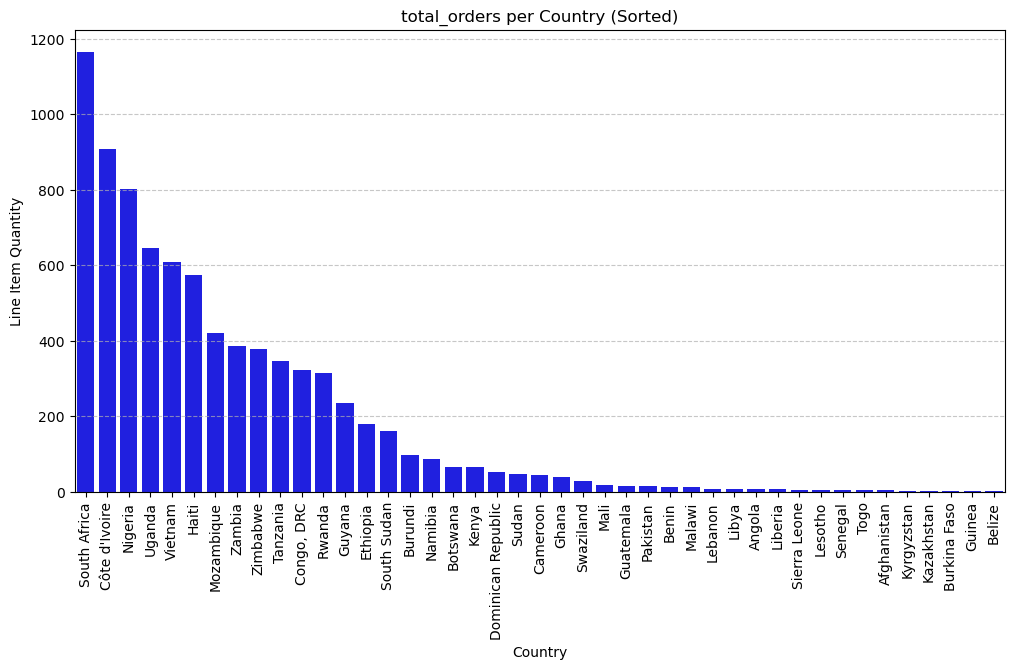

In [120]:
country_shipments = df["Country"].value_counts().reset_index()
country_shipments.columns = ["Country", "Line Item Quantity"]


country_shipments = country_shipments.sort_values(by="Line Item Quantity", ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=country_shipments, x="Country", y="Line Item Quantity", color="blue")


plt.xticks(rotation=90)

# Labels and title
plt.xlabel("Country")
plt.ylabel("Line Item Quantity")
plt.title("total_orders per Country (Sorted)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### High-Demand Countries: 
#### South Africa, Côte d'Ivoire, and Nigeria require priority in supply chain planning due to high order volumes.
### Moderate Demand:
#### Countries like Uganda and Vietnam show potential for growth and should be monitored.
### Low Demand:
#### Countries like Belize, Guinea, and Burkina Faso have minimal orders, indicating possible distribution inefficiencies or low market presence.
### Regional Trends:
#### Africa dominates demand, suggesting the need for strong regional logistics and supplier networks.
### Actionable Steps: 
#### Optimize inventory, strengthen supplier partnerships in high-demand areas, and assess logistics constraints in low-performing regions.

#

## 2- What is the Most Common Shipment Mode & Average Freight Cost per Country?

#

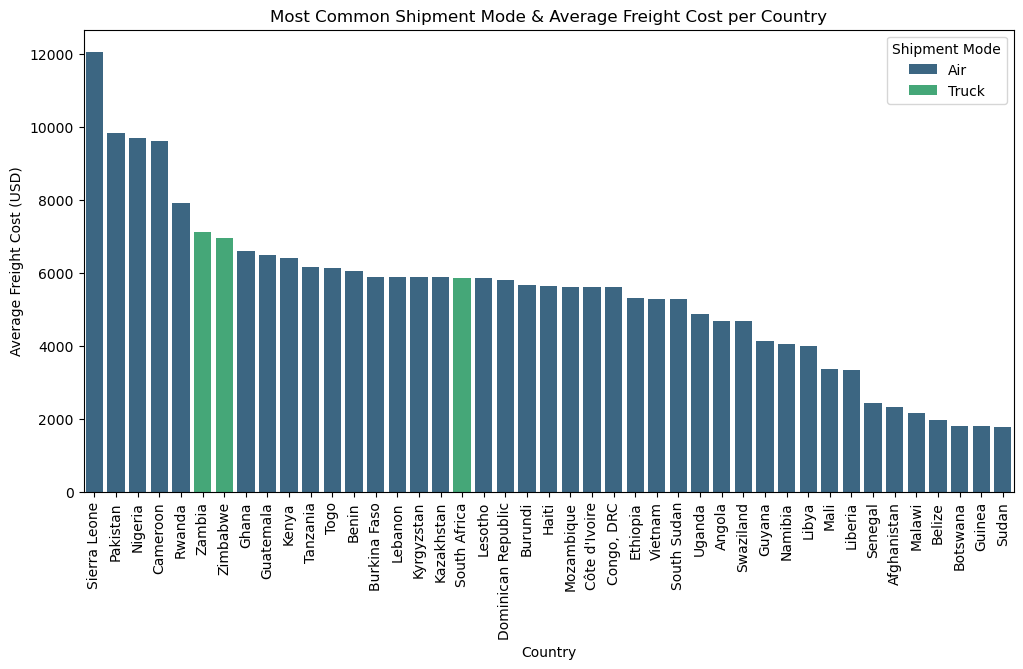

In [126]:
# Find the most common shipment mode for each country
most_common_shipment = df.groupby("Country")["Shipment Mode"].agg(lambda x: x.value_counts().idxmax())

# Calculate the average freight cost per country
avg_freight_cost = df.groupby("Country")["Freight Cost (USD)"].mean()

# Combine results into a single DataFrame
shipment_analysis = pd.DataFrame({
    "Most Common Shipment Mode": most_common_shipment,
    "Average Freight Cost (USD)": avg_freight_cost
}).reset_index()

# Sort by average freight cost for better visualization
shipment_analysis = shipment_analysis.sort_values(by="Average Freight Cost (USD)", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=shipment_analysis, x="Country", y="Average Freight Cost (USD)", hue="Most Common Shipment Mode", dodge=False, palette="viridis")

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Country")
plt.ylabel("Average Freight Cost (USD)")
plt.title("Most Common Shipment Mode & Average Freight Cost per Country")
plt.legend(title="Shipment Mode")
plt.show()

#### Air transport is the dominant shipment mode but significantly increases freight costs, making supply chain expenses higher.
#### Countries like Sierra Leone, Pakistan, and Nigeria have the highest freight costs, indicating possible inefficiencies in logistics or expensive shipping routes.
#### Switching to cost-effective shipment modes like trucks or optimizing shipping routes can reduce overall supply chain costs.

#

## 3- What is the distribution of shipment modes used in the supply chain?

#

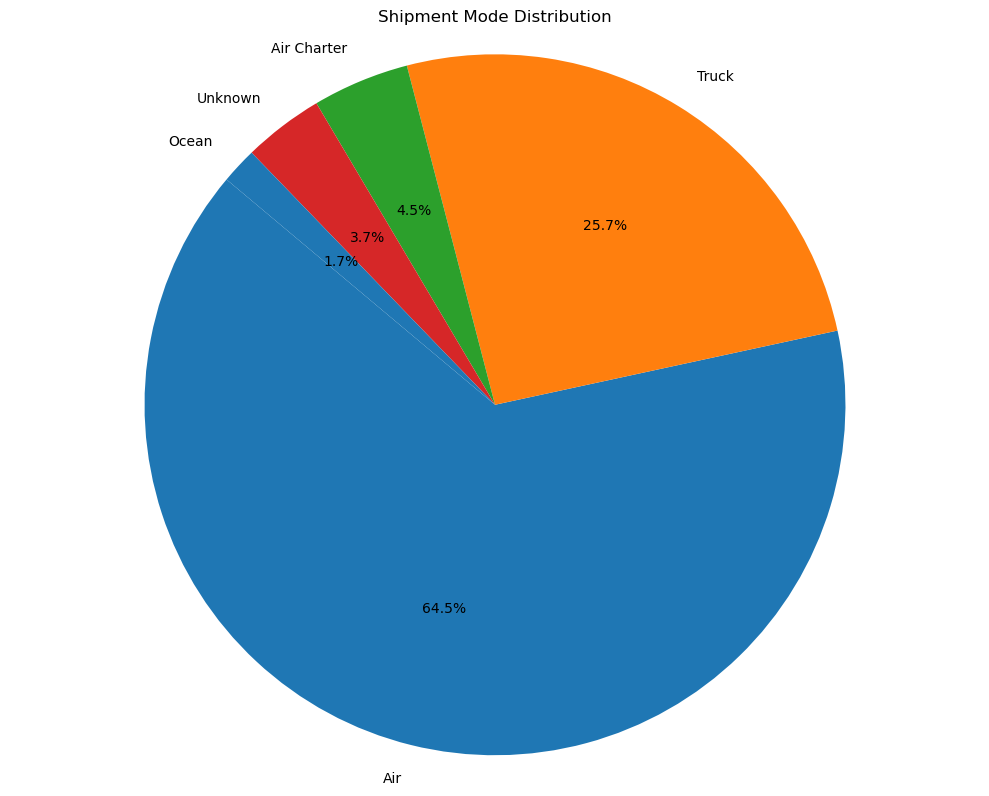

In [137]:
# Group by shipment mode and count occurrencest
plt.figure(figsize=(10, 8))  # Increase figure size if desired
plt.pie(shipment_counts, labels=shipment_counts.index, autopct='%1.1f%%',
        startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Shipment Mode Distribution')
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.tight_layout()  # Minimizes padding
plt.show()

plt.show()

#### Air is the dominant shipping mode (64.5%), meaning most shipments rely on air transport, which is often faster but more expensive.
#### Truck accounts for 25.7%, indicating that road transport plays a significant role, likely for regional or last-mile deliveries.
#### Alternative modes (Air Charter, Ocean, Unknown) make up a small percentage, suggesting they are used in special cases or for less frequent shipments.

#

## 4- What is the distribution of actual delivery times, and are there significant delays or early deliveries?

#

In [143]:
# Ensure the columns are correctly converted to datetime
df["Scheduled Delivery Date"] = pd.to_datetime(df["Scheduled Delivery Date"], format="%d-%b-%y", errors="coerce")
df["Delivered to Client Date"] = pd.to_datetime(df["Delivered to Client Date"], format="%d-%b-%y", errors="coerce")

# Verify the data types
print(df.dtypes)

# Now calculate the actual delivery time in days
df["Actual Delivery Time (Days)"] = (df["Delivered to Client Date"] - df["Scheduled Delivery Date"]).dt.days

# Display the first few rows with the new column
print(df[["Scheduled Delivery Date", "Delivered to Client Date", "Actual Delivery Time (Days)"]].head())

Project Code                         object
Country                              object
Managed By                           object
Fulfill Via                          object
Shipment Mode                        object
Scheduled Delivery Date      datetime64[ns]
Delivered to Client Date     datetime64[ns]
Product Group                        object
Sub Classification                   object
Vendor                               object
Item Description                     object
Molecule/Test Type                   object
Brand                                object
Line Item Quantity                    int64
Line Item Value                     float64
Pack Price                          float64
Unit Price                          float64
Weight (Kilograms)                  float64
Freight Cost (USD)                  float64
Line Item Insurance (USD)           float64
dtype: object
  Scheduled Delivery Date Delivered to Client Date  \
0              2006-06-02               2006-06-02  

In [145]:
print(df[["Scheduled Delivery Date", "Delivered to Client Date"]].isna().sum())

Scheduled Delivery Date     0
Delivered to Client Date    0
dtype: int64


In [147]:
avg_transit_time_per_country = df.groupby("Country")["Actual Delivery Time (Days)"].mean().reset_index()

avg_transit_time_per_country = avg_transit_time_per_country.sort_values(by="Actual Delivery Time (Days)", ascending=False)

print(avg_transit_time_per_country)

               Country  Actual Delivery Time (Days)
8           Congo, DRC                    11.403727
38                Togo                     5.333333
3                Benin                     2.916667
31             Senegal                     1.000000
0          Afghanistan                     0.000000
17          Kazakhstan                     0.000000
32        Sierra Leone                     0.000000
29            Pakistan                     0.000000
25                Mali                     0.000000
24              Malawi                     0.000000
22             Liberia                     0.000000
1               Angola                     0.000000
20             Lebanon                     0.000000
19          Kyrgyzstan                     0.000000
21             Lesotho                     0.000000
5         Burkina Faso                     0.000000
14              Guinea                     0.000000
18               Kenya                    -0.276923
40          

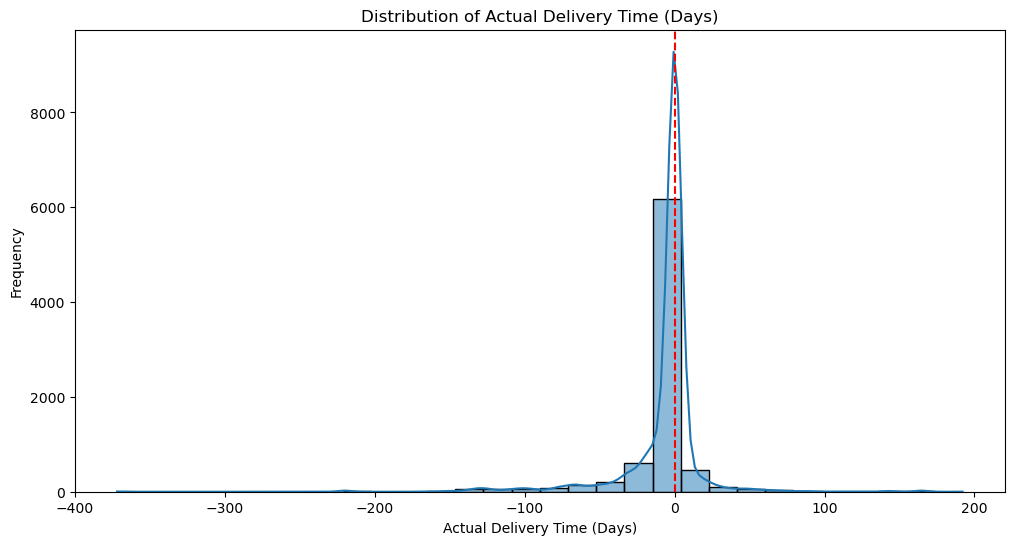

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df["Actual Delivery Time (Days)"], bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed') 
plt.title("Distribution of Actual Delivery Time (Days)")
plt.xlabel("Actual Delivery Time (Days)")
plt.ylabel("Frequency")
plt.show()

#### Most deliveries occur around the expected time (0 days), meaning the supply chain generally meets delivery deadlines.
#### There are extreme negative and positive values, indicating early and late deliveries, which could be due to logistical inefficiencies or errors.
#### The presence of significantly negative values (e.g., -100 days or lower) suggests potential data errors or misreported delivery dates.


#

## 5- Which countries experience the highest number of delayed shipments?

#

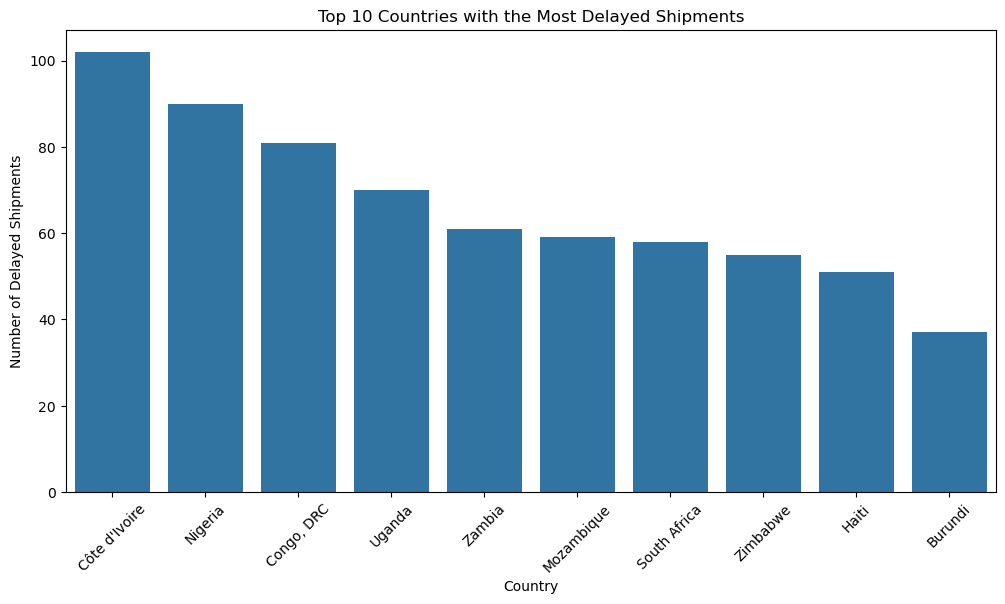

In [155]:
# Filter for delayed shipments (actual delivery time > 0)
delayed_shipments = df[df["Actual Delivery Time (Days)"] > 0]

# Count the number of delays per country
delayed_countries = delayed_shipments["Country"].value_counts()

# Convert to DataFrame for Seaborn
delayed_df = delayed_countries.reset_index()
delayed_df.columns = ["Country", "Number of Delayed Shipments"]

# Plot the top 10 countries with the most delays
plt.figure(figsize=(12,6))
sns.barplot(data=delayed_df[:10], x="Country", y="Number of Delayed Shipments")
plt.xticks(rotation=45)
plt.title("Top 10 Countries with the Most Delayed Shipments")
plt.xlabel("Country")
plt.ylabel("Number of Delayed Shipments")
plt.show()


#### Côte d'Ivoire has the highest number of delayed shipments, followed by Nigeria and Congo (DRC).
#### Delays are concentrated in African countries, suggesting potential regional logistical challenges.
#### The delay count gradually decreases from Côte d'Ivoire (100+) to Burundi (around 30).

#

## 6- Which manufacturers (vendors) have the most delayed shipments?

#

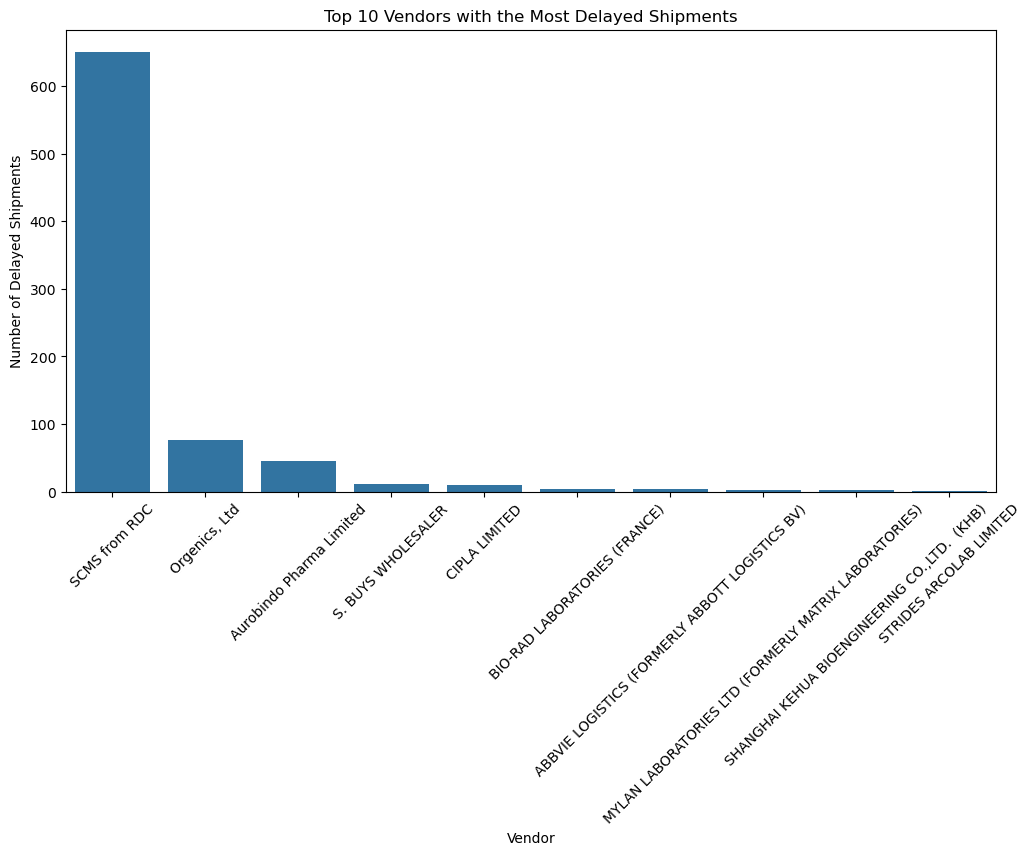

In [161]:
# Count delays per vendor
delayed_vendors = delayed_shipments["Vendor"].value_counts().reset_index()
delayed_vendors.columns = ["Vendor", "Number of Delayed Shipments"]

# Plot top 10 delayed vendors
plt.figure(figsize=(12,6))
sns.barplot(data=delayed_vendors[:10], x="Vendor", y="Number of Delayed Shipments")
plt.xticks(rotation=45)
plt.title("Top 10 Vendors with the Most Delayed Shipments")
plt.xlabel("Vendor")
plt.ylabel("Number of Delayed Shipments")
plt.show()

#### SCMS from RDC has the highest delayed shipments (>600), far exceeding other vendors.
#### Other vendors have significantly fewer delays, with the second and third highest below 100.
#### Potential causes: supply chain inefficiencies, transportation issues, or customs delays.
#### Recommendations: AInvestigate SCMS delays, diversify vendors, and optimize logistics.

#

## 7- Which product groups are most frequently delayed?

#

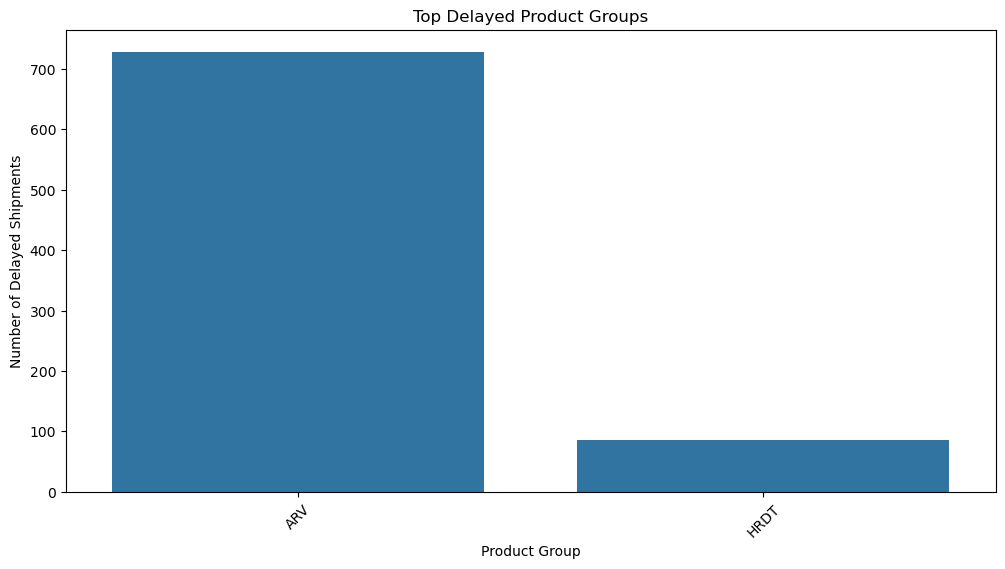

In [167]:
# Count delays per product group
delayed_products = delayed_shipments["Product Group"].value_counts().reset_index()
delayed_products.columns = ["Product Group", "Number of Delayed Shipments"]

# Plot top  delayed product groups
plt.figure(figsize=(12,6))
sns.barplot(data=delayed_products[:10], x="Product Group", y="Number of Delayed Shipments")
plt.xticks(rotation=45)
plt.title("Top Delayed Product Groups")
plt.xlabel("Product Group")
plt.ylabel("Number of Delayed Shipments")
plt.show()


#### ARV product group has the highest delayed shipments (>700), dominating delays.
#### HROT has significantly fewer delays, indicating better supply chain performance.
#### Potential causes: supply shortages, production bottlenecks, or distribution issues.
#### Recommendations: Prioritize ARV logistics, optimize vendor management, and assess supply chain risks.

#

# Conclusion

## The analysis of the supply chain data revealed that the majority of shipments are made by truck, followed by air, ship, and train. This indicates a strong reliance on road transportation, which may offer greater flexibility and shorter transit times for most shipments. However, depending on cost and environmental considerations, there may be opportunities to optimize logistics by diversifying shipping modes or exploring more sustainable alternatives such as rail or sea transport.

